In [172]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sweetviz as sv

In [173]:
df = pd.read_csv('titanic_train.csv')

In [174]:
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


Here is null function is to find the data which is missing in our dataset

In [175]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Here we have used "seaborn" to visually represent the missing data and i have a cbar kwargs to give more details to the graph

Question 1

How does survival rate vary across different passenger classes (pclass)?

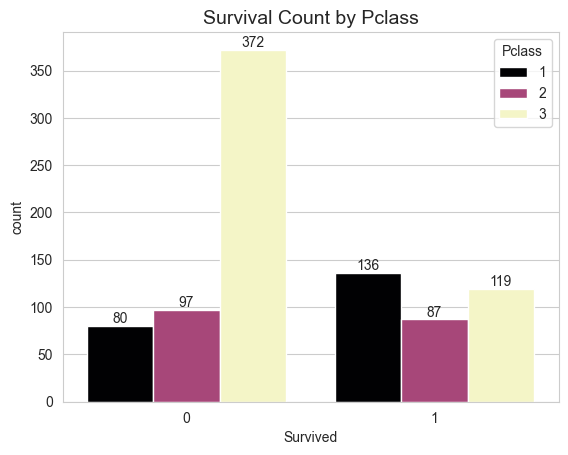

In [176]:
sns.set_style('whitegrid')
k=sns.countplot(x='Survived',hue='Pclass',data=df,palette="magma")
for container in k.containers:
    k.bar_label(container, fontsize=10) #automatically places correct values on each hue bar
plt.title("Survival Count by Pclass", fontsize=14) #to put title in the plot
plt.show() #to show the plot

IN THE ABOVE GRAPH WE HAVE DATA OF SURVIVAL OF THREE CLASSES

HERE,   Survived = 0 [allah ko payaare]

        Survived = 1 [allah ke bande]

So, most of the person that died are from 3rd class as it was the lowest class and people were obviously saved on priority basis.

The Pclass 1 class have the most survived passangers and less people died of Pclass 1      

Question 2

What is the relationship between passenger gender and survival?

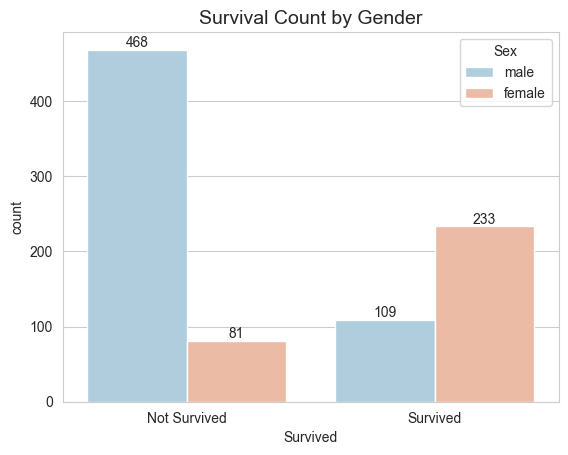

In [177]:
sns.set_style('whitegrid')
s=sns.countplot(x='Survived',hue='Sex',data=df,palette='RdBu_r')  

for container in s.containers:
    s.bar_label(container, fontsize=10) #automatically places correct values on each hue bar
plt.title("Survival Count by Gender", fontsize=14) #to put title in the plot
plt.xticks([0,1], ['Not Survived', 'Survived']) #to change x axis labels
plt.show() #to show the plot

SO,

The above graph shows the Survival rate by gender in the titanic. One can clearly spot the ratio of male and female survival rate through graph only 81 females died on the other hand 468 males died. So, it's easy to conclude that the gender really affects the survival prediction


Question 3

How does age distribution differ between survivors and non-survivors?

C:\Users\abhin\AppData\Local\Temp\ipykernel_10896\3297218224.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Age'].dropna(),kde=False,color='yellow')


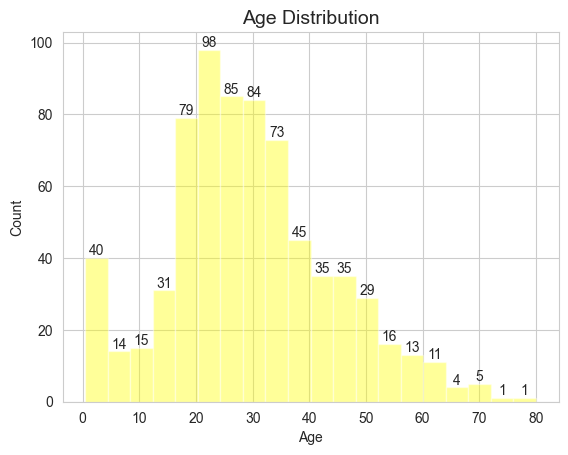

In [178]:
sns.distplot(df['Age'].dropna(),kde=False,color='yellow')
for container in plt.gca().containers: #to get the current axis
    plt.gca().bar_label(container, fontsize=10)    #automatically places correct values on each bar
plt.title("Age Distribution", fontsize=14) #to put title in the plot    
plt.xlabel("Age") #to put label in x-axis
plt.ylabel("Count") #to put label in y-axis
plt.show()  

In [179]:
df["Age"].notnull().sum()

714

so here we can see there is no null value and if we do the sum of the above all the age count then we will get 714

C:\Users\abhin\AppData\Local\Temp\ipykernel_10896\2196471691.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


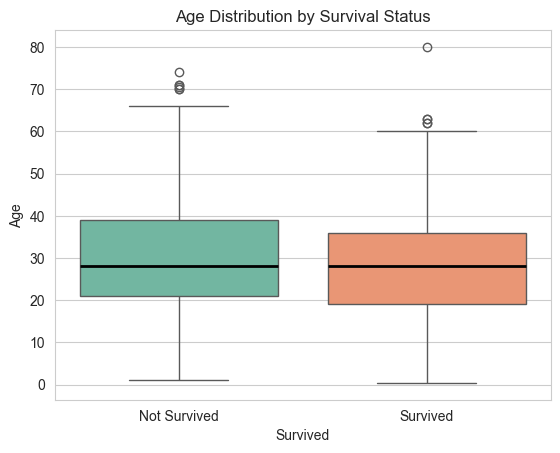

In [180]:
sns.boxplot(
    x="Survived",y="Age",data=df, palette="Set2",#  setting x and y axis data and color palette
    medianprops={"color":"black","linewidth":2} #customizing median line    
)

plt.xticks([0,1], ['Not Survived', 'Survived']) 
plt.title("Age Distribution by Survival Status")
plt.show()


By the above graph plot, it's easy to conclude the survival rate by age distribution. By median of non-survival and survival we can easily conclude the diffrence.

Question 4

Does family size (sibsp + parch) affect survival probability?    

In [181]:
df["FamilySize"] = df["SibSp"] + df["Parch"]
df.groupby("FamilySize")["Survived"].mean()



FamilySize
0     0.303538
1     0.552795
2     0.578431
3     0.724138
4     0.200000
5     0.136364
6     0.333333
7     0.000000
10    0.000000
Name: Survived, dtype: float64

C:\Users\abhin\AppData\Local\Temp\ipykernel_10896\395194668.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.pointplot(x="FamilySize",y="Survived",data=df,ci=None)#plotting survival probability against family size


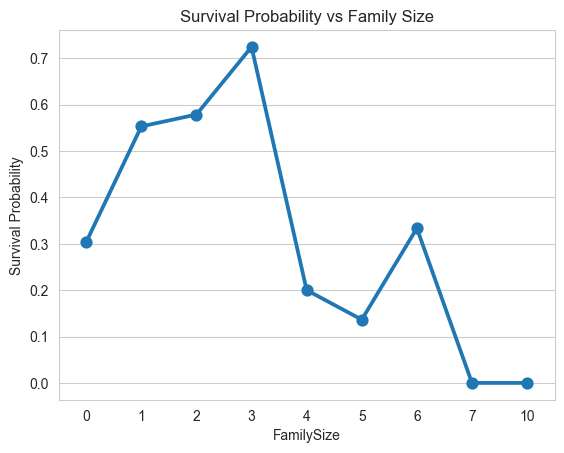

In [182]:
sns.pointplot(x="FamilySize",y="Survived",data=df,ci=None)#plotting survival probability against family size

plt.title("Survival Probability vs Family Size")
plt.ylabel("Survival Probability")
plt.show()


In the Titanic dataset:

SibSp = number of siblings / spouses aboard

Parch = number of parents / children aboard

So, FamilySize = SibSp + Parch

This tells us how many family members a passenger had with them.

By the point plot we can conclude if the family size really affects the surviival rate


Question 5

How does fare paid relate to survival chances?

C:\Users\abhin\AppData\Local\Temp\ipykernel_10896\3828529519.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x="Survived",y="Fare",data=df,palette="Set2",inner="quartile")


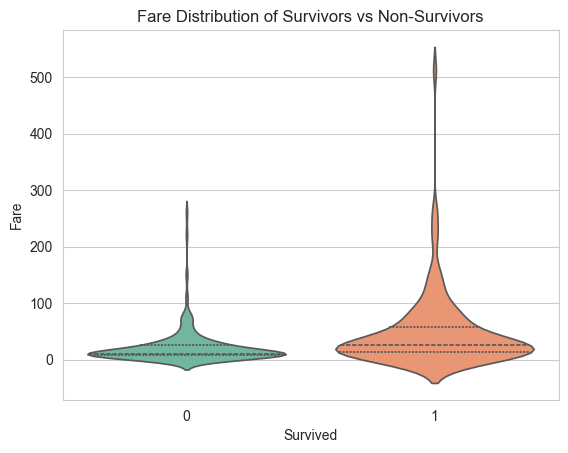

In [183]:
sns.violinplot(x="Survived",y="Fare",data=df,palette="Set2",inner="quartile")

plt.title("Fare Distribution of Survivors vs Non-Survivors")
plt.show()


In the Titanic dataset:

Fare is the amount paid for the ticket

It is strongly associated with:

Passenger class (1st, 2nd, 3rd)

Cabin location

Socio-economic status

So fare is an indirect indicator of privilege and access.

By this violin plot we can easily determine the survival rate by fare price.

Question 6

What percentage of passengers survived overall?

In [184]:
passanger_survival = df["Survived"].mean()*100
print(passanger_survival)

38.38383838383838


Question 7

What is the survival rate for each gender?

In [185]:
#Male
male_survival = df[df["Sex"] == "male"]["Survived"].mean()*100
print("male survived = ",male_survival)

#Female
Female_survival = df[df["Sex"]=="female"]["Survived"].mean()*100
print("female survived = ",Female_survival)

male survived =  18.890814558058924
female survived =  74.20382165605095


Question 8

What is the average age of survivors vs non-survivors?

In [186]:
#Average age of survivors
Average_age_survival = df[df["Survived"] == 1]["Age"].mean()
print("Average age survived",Average_age_survival)

#Average age of non-survivors
Average_age_nonsurvival = df[df["Survived"] == 0]["Age"].mean()
print("Average age non-survived",Average_age_nonsurvival)

Average age survived 28.343689655172415
Average age non-survived 30.62617924528302


Question 9

What is the median fare paid by survivors compared to non-survivors?

In [187]:
median_fare = df[df["Survived"] == 1]["Fare"].median()
print("Median fare of survived passangers",median_fare)

median_fare_nonsurvived = df[df["Survived"] == 0]["Fare"].median()
print("Median fare of non-survived passangers",median_fare_nonsurvived)

Median fare of survived passangers 26.0
Median fare of non-survived passangers 10.5


Question 10

What proportion of passengers traveled alone versus with family?

In [188]:
travel_withfamily = df[df["FamilySize"] > 0]["Survived"].mean()*100 #if we consider family size greater than 0
print("Survival rate of passangers traveling with family",travel_withfamily)

travel_alone = df[df["FamilySize"] == 0]["Survived"].mean()*100 #if we consider family size equal to 0
print("Survival rate of passangers traveling alone",travel_alone)

Survival rate of passangers traveling with family 50.56497175141242
Survival rate of passangers traveling alone 30.353817504655495


In [189]:
# sviz = sv.analyze(df)

# sviz.show_html('titanic_report.html')

DATA CLEANING

C:\Users\abhin\AppData\Local\Temp\ipykernel_10896\2494935751.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Pclass',y='Age',data=df,palette='rainbow')


Pclass
1    37.0
2    29.0
3    24.0
Name: Age, dtype: float64

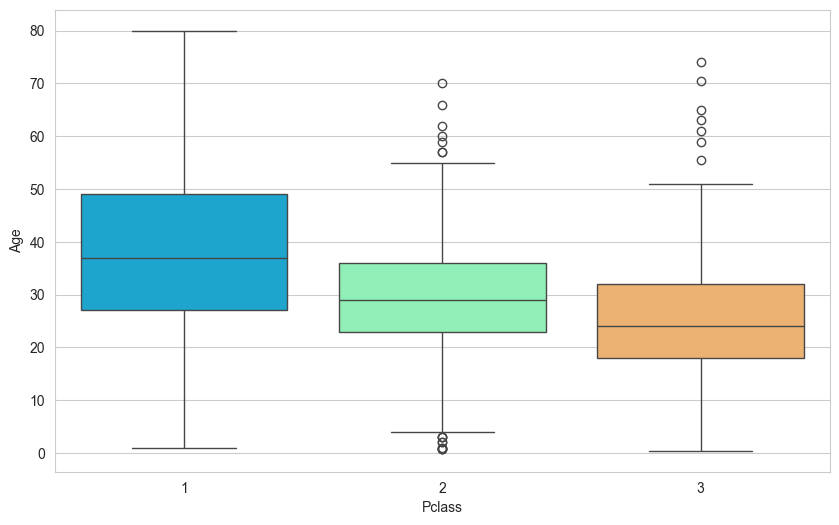

In [190]:
plt.figure(figsize=(10,6))
sns.boxplot(x='Pclass',y='Age',data=df,palette='rainbow')

df.groupby('Pclass')['Age'].median()




In [191]:
import pandas as pd
import numpy as np

def replacing_age(cols):
    age, pclass = cols

    if pd.isna(age):
        if pclass == 1:
            return 37
        elif pclass == 2:
            return 29
        elif pclass == 3:
            return 24
        else:
            return np.nan
    else:
        return age
    
    



In [192]:
train = pd.read_csv('titanic_train.csv')
train['Age'] = train[['Age','Pclass']].apply(replacing_age,axis=1)

In [193]:


train["Age"].isna().sum()

0

In [194]:
train.drop('Cabin',axis=1,inplace=True)

<Axes: >

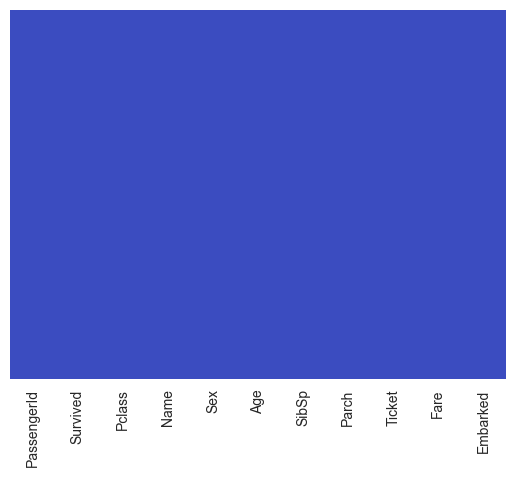

In [195]:
sns.heatmap(train.isnull(), yticklabels=False,cbar = False, cmap='coolwarm')

In [196]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

train['Embarked'] = le.fit_transform(train['Embarked'])
train["Sex"] = le.fit_transform(train["Sex"])


In [197]:
train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,2
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,2
5,6,0,3,"Moran, Mr. James",1,24.0,0,0,330877,8.4583,1
6,7,0,1,"McCarthy, Mr. Timothy J",1,54.0,0,0,17463,51.8625,2
7,8,0,3,"Palsson, Master. Gosta Leonard",1,2.0,3,1,349909,21.0750,2
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",0,27.0,0,2,347742,11.1333,2
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",0,14.0,1,0,237736,30.0708,0


// modeling,analysis,preprocessing done 
// test and train:75% training ,25% test
// titanic data :missing values handling done
// split data
// train model
// test model

In [198]:
train.drop(['Name','Ticket'],axis=1,inplace=True)

In [199]:
train.head(100)


,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,1,22.0,1,0,7.2500,2
1,2,1,1,0,38.0,1,0,71.2833,0
2,3,1,3,0,26.0,0,0,7.9250,2
3,4,1,1,0,35.0,1,0,53.1000,2
4,5,0,3,1,35.0,0,0,8.0500,2
...,...,...,...,...,...,...,...,...,...
95,96,0,3,1,24.0,0,0,8.0500,2
96,97,0,1,1,71.0,0,0,34.6542,0
97,98,1,1,1,23.0,0,1,63.3583,0
98,99,1,2,0,34.0,0,1,23.0000,2


Spliting data 

Target = Survived

Features = everything except Survived

In [200]:
X = train.drop('Survived', axis=1,inplace=False)
y = train['Survived']

In [201]:
X.head(100)

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,3,1,22.0,1,0,7.2500,2
1,2,1,0,38.0,1,0,71.2833,0
2,3,3,0,26.0,0,0,7.9250,2
3,4,1,0,35.0,1,0,53.1000,2
4,5,3,1,35.0,0,0,8.0500,2
...,...,...,...,...,...,...,...,...
95,96,3,1,24.0,0,0,8.0500,2
96,97,1,1,71.0,0,0,34.6542,0
97,98,1,1,23.0,0,1,63.3583,0
98,99,2,0,34.0,0,1,23.0000,2


In [202]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)


In [203]:
from sklearn.linear_model import LogisticRegression

logmodel = LogisticRegression(max_iter=1000)


In [204]:
pred_df = pd.DataFrame({
    'Actual': y_test.values,
    'Predicted': predictions
})

pred_df.head()
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, predictions))

NameError: name 'predictions' is not defined

In [ ]:
logmodel.fit(X_train,y_train)

ValueError: Input X contains NaN.
LogisticRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [ ]:
predictions 

In [ ]:
accuracy = logmodel.score(X_test, y_test)
print("Accuracy:", accuracy)

everything done 